Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

C:\Users\anami\AppData\Local\Temp\ipykernel_1836\1320168376.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Reading the data

In [2]:
#connecting to drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Reading the data from CSV File
# dataframe=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test Heart/heart_disease_data.csv")
dataframe = pd.read_csv('data/heart_disease_data.csv')
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Data Analysis

In [4]:
#data analysis
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#whether the dataset has null values or not
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Correlation Matrix

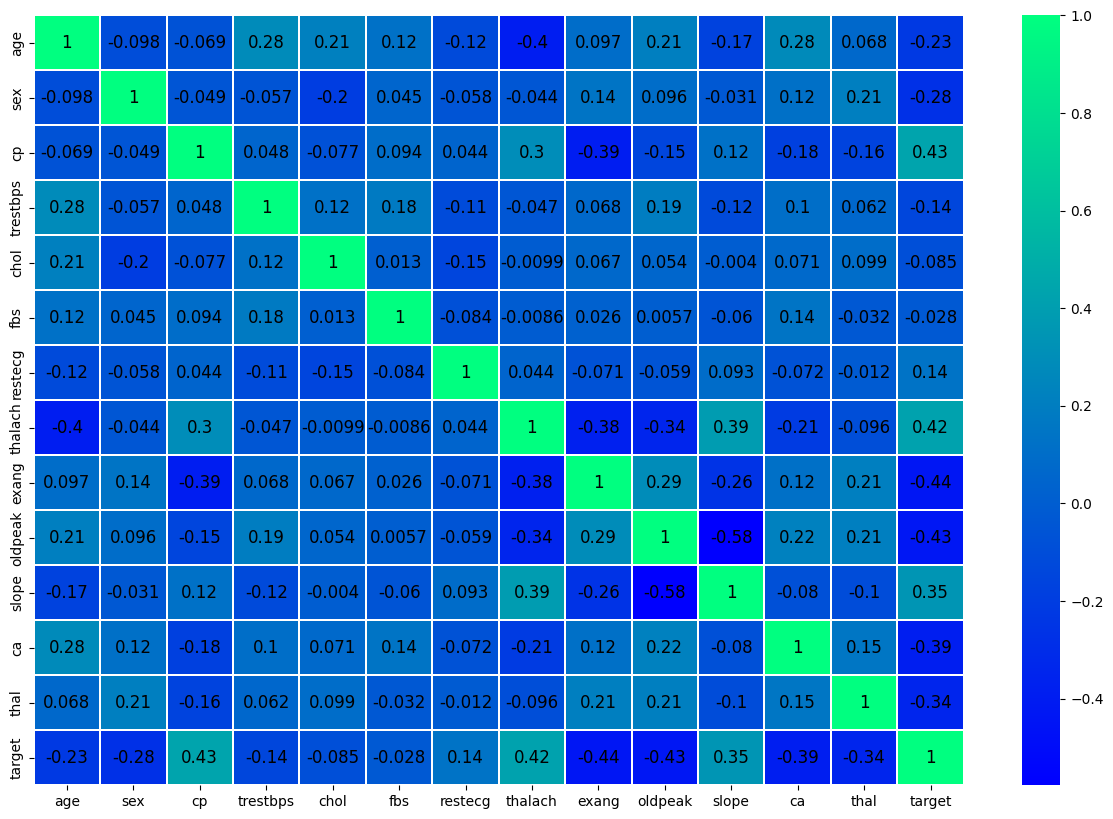

<Figure size 640x480 with 0 Axes>

In [6]:
#Visulaizing the data features to find the correlation between them which will infer the important features
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter", annot_kws={"size": 12, "color": 'black'})
heatmap.figure.axes[-1].yaxis.label.set_size(14)
plt.show()
plt.savefig('correlationfigure')

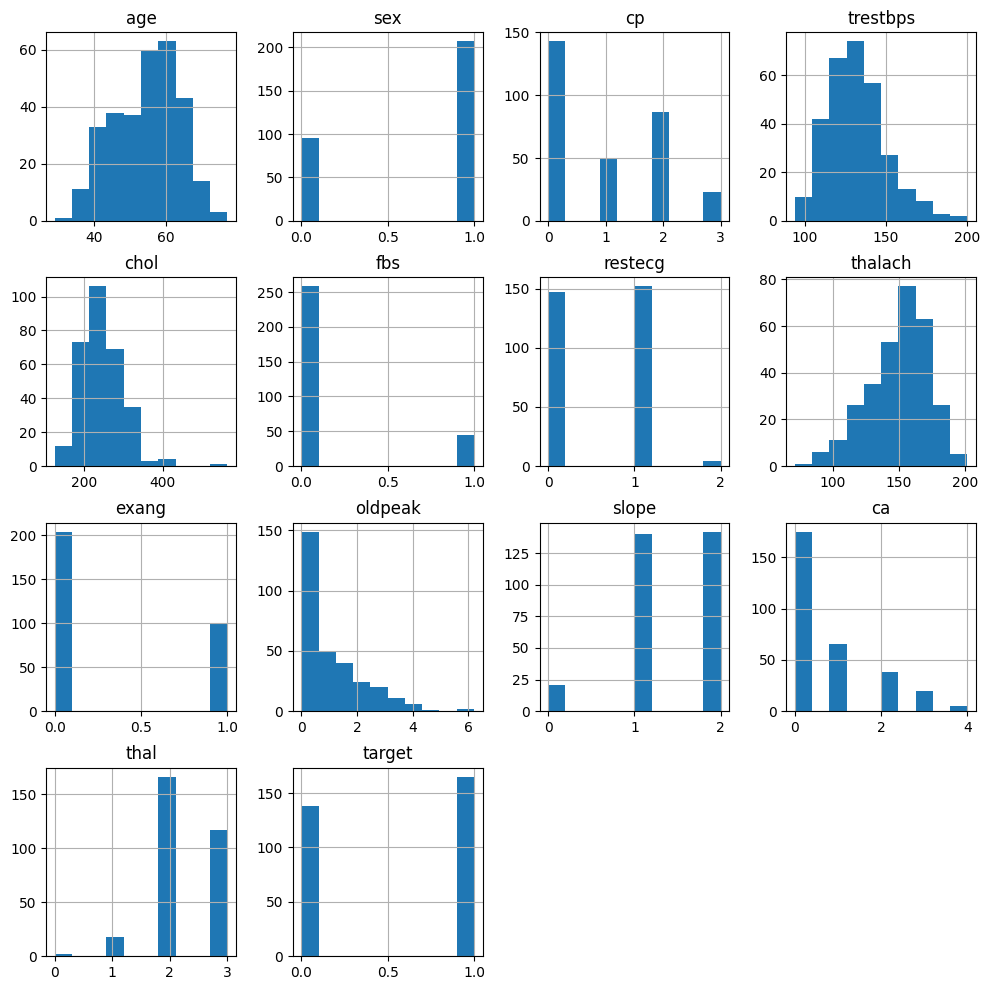

In [7]:
#the relation between each features distribution with the help of histogram
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

Train Test Split

In [8]:
#splitting the features and target
X = dataframe.drop(columns='target', axis=1)
y = dataframe['target']

In [9]:
#train test split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

Algorithm Implementation

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 88.16
Testing Accuracy for Logistic Regression: 0.881578947368421
Testing Sensitivity for Logistic Regression: 0.9032258064516129
Testing Specificity for Logistic Regression: 0.8666666666666667
Testing Precision for Logistic Regression: 0.8235294117647058

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.87      0.93      0.90        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



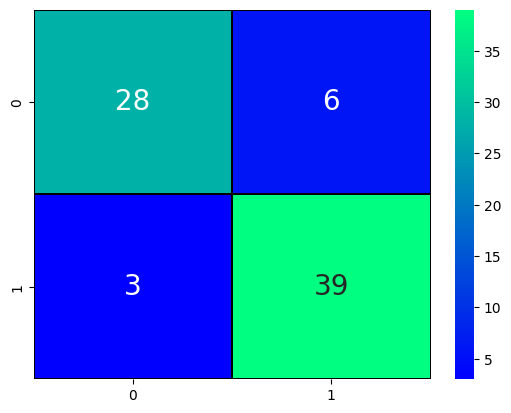

In [10]:
#Logistic Regression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print("\n",round(accuracy_score(prediction1,y_test)*100,2))
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

print("\nClassification Report:")
print(classification_report(y_test, prediction1))

96.05
Testing Accuracy for Decision Tree: 0.9605263157894737
Testing Sensitivity for Decision Tree: 1.0
Testing Specificity for Decision Tree: 0.9333333333333333
Testing Precision for Decision Tree: 0.9117647058823529

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      1.00      0.97        42

    accuracy                           0.96        76
   macro avg       0.97      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76



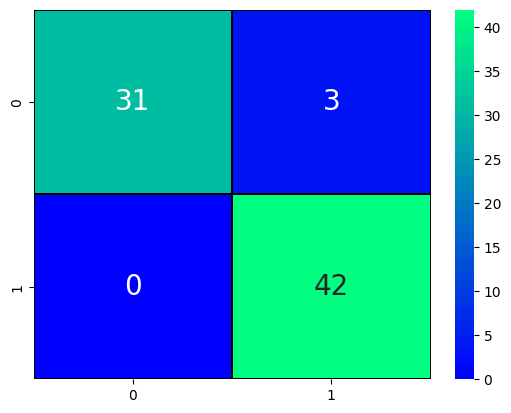

In [11]:
#Decision Tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(round(accuracy_score(prediction,y_test)*100,2))
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

print("\nClassification Report:")
print(classification_report(y_test, prediction))

85.53
Testing Accuracy for Random Forest: 0.8552631578947368
Testing Sensitivity for Random Forest: 0.8484848484848485
Testing Specificity for Random Forest: 0.8604651162790697
Testing Precision for Random Forest: 0.8235294117647058

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.86      0.88      0.87        42

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



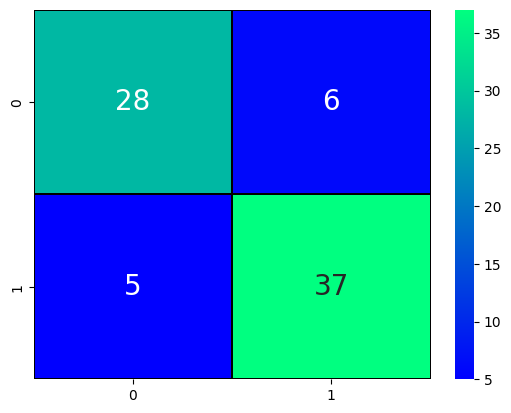

In [12]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

#classification Report
print("\nClassification Report:")
print(classification_report(y_test, prediction3))

86.84
Testing Accuracy for SVM: 0.868421052631579
Testing Sensitivity for SVM: 0.8529411764705882
Testing Specificity for SVM: 0.8809523809523809
Testing Precision for SVM: 0.8529411764705882

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.88      0.88      0.88        42

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



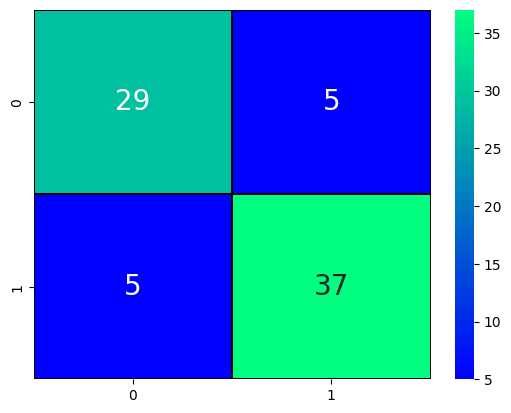

In [13]:
#Support Vector Machine(SVM)
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

print(round(accuracy_score(prediction4,y_test)*100,2))
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

print("\nClassification Report:")
print(classification_report(y_test, prediction4))

Final Model Implementation

In [14]:
#CASE 1: For Heart Disease Data (Decision Tree)
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
#CASE 2: For Normal Data (Decision Tree)
input=(57,1,0,130,131,0,1,115,1,1.2,1,1,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
#(Logistic Regression)
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)  #Normal Data
# input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1) #Heart Disease Data
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(tree_model, f)